##  Azure Synapse Analytics

The Data Engineer's Job is to make sure the data that comes in from variety of sources and in different format need to be converted in shape and that can be used for analysis and visulization.Then transformed data need to be put in target state and data store.

#### what is Datawarehouse?

A data warehouse is a system that stores and organizes data from multiple sources into a single location for analysis and reporting. It's a key component of business intelligence (BI) and is used for decision making, data mining, machine learning, and artificial intelligence. <br>
Here are some characteristics of a data warehouse: <br>
-       Centralized: A data warehouse stores data from multiple sources in a single location. <br>
-       Integrated: A data warehouse creates consistency among data from different sources. <br>
-       Subject-oriented: A data warehouse can analyze data about a specific subject or functional area. <br>
-       Nonvolatile: Data in a data warehouse is stable and doesn't change. <br>
Data warehouses can store both structured and unstructured data. Structured data includes information about people, products, and transactions. Unstructured data includes documents, images, videos, emails, social media posts, and raw data from machine sensors. 
The process of combining data from multiple sources into a data warehouse is called extract, transform, and load (ETL).

<br>You can use SQL query language to work with data in .
To get insights aboyt the transactional we cannot use directly because it will affect our application so we take the data from SQL database and transfer it to the data warehouse.

##### Basics of Azure Synapse
Azure Synapse is an enterprise analytics service that accelerates time to insight across data warehouses and big data systems. Azure Synapse brings together the best of SQL technologies used in enterprise data warehousing, Spark technologies used for big data, Data Explorer for log and time series analytics, Pipelines for data integration and ETL/ELT, and deep integration with other Azure services such as Power BI, CosmosDB, and AzureML.
<br> <br>
Diagram of Azure Synapse Analytics architecture.
<br>
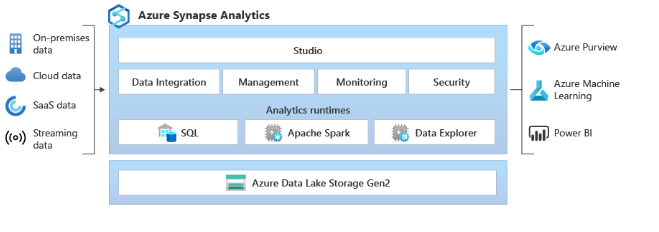
<br> Synapse Sql - host your sql data warehouse
<br> Apache Spark - Data engineering stuff
<br> Data Integration - Azure Data factory like features


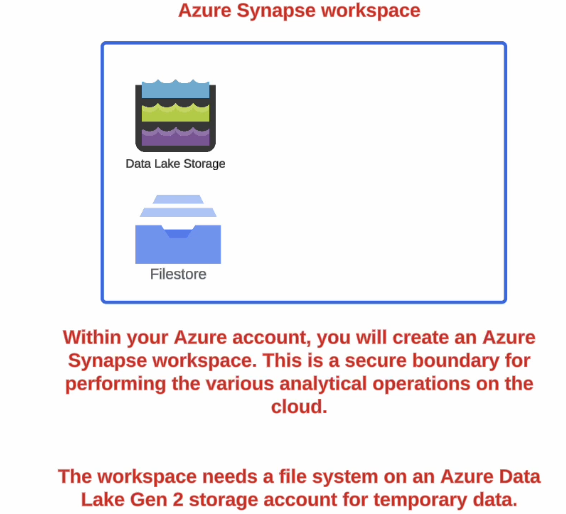

#### Creating Azure Syanpse account
In search tab find azure synapse and then follow below steps.

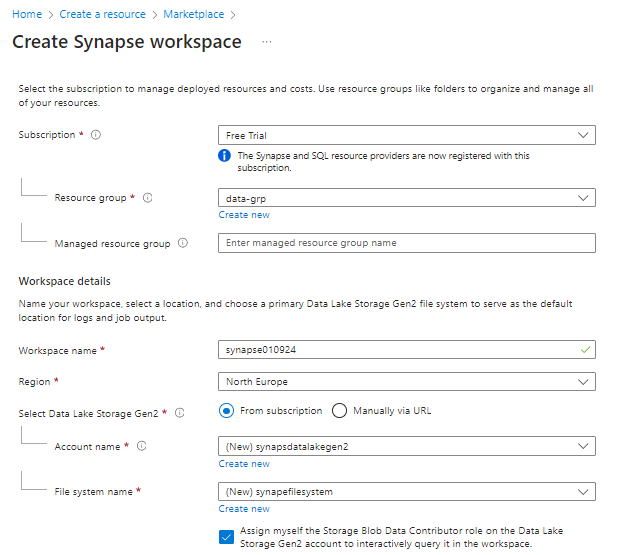

<br>In security tab put the password

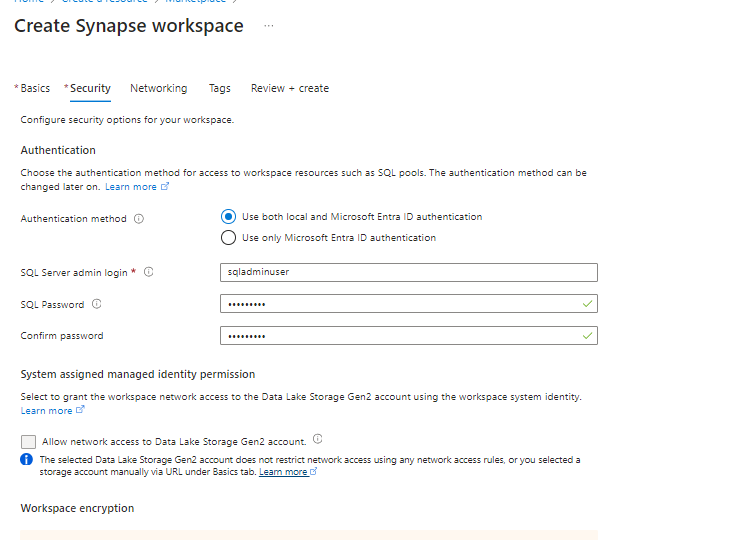
<br> Then just click next and click on create

So basically we are creating  secure boundry which will help to host datawarehouse and it wants to provide features and tools to analyse data. 

USERNAME : sqladminuser <br>
Password : DeDp@203Hl <br>

An Azure Synapse Analytics workspace is a secure environment for cloud-based enterprise analytics in Azure. It has the following features:
-       Collaboration: A workspace is a boundary for collaboration.
-       Location: A workspace is deployed in a specific region.
-       File system: A workspace has an associated ADLS Gen2 account and file system for temporary data.
-       Resource group: A workspace is under a resource group.
-       Analytics: A workspace allows you to perform analytics with SQL and Apache Spark.
-       Pools: Resources for SQL and Spark analytics are organized into SQL and Spark pools. 
Azure Synapse Analytics is an enterprise analytics service that combines SQL, Apache Spark, and Azure Data Explorer technologies. It helps you get insights from data warehouses and big data systems faster. 

#### Serverless SQL 

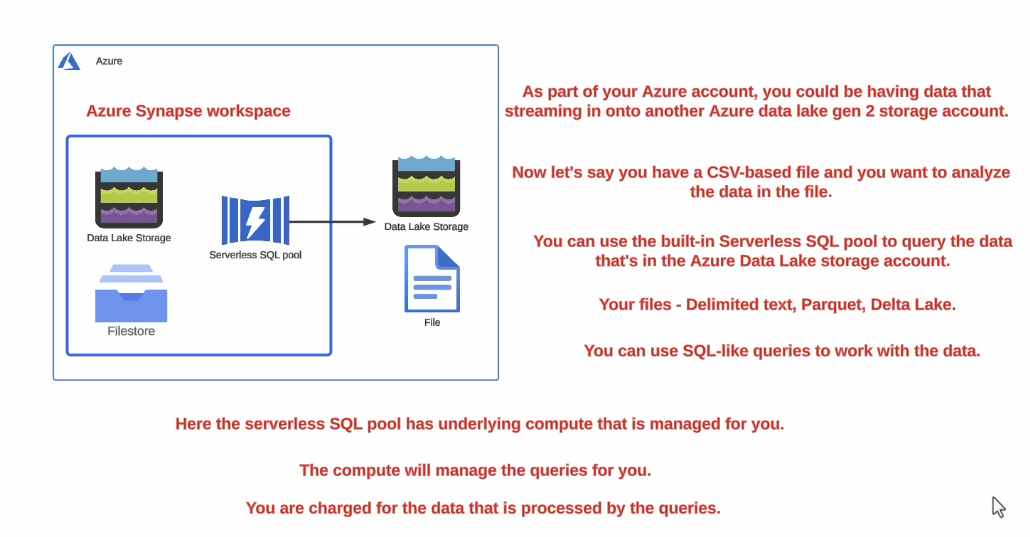



A serverless SQL pool is a distributed data processing system in Azure Synapse Analytics that allows users to analyze large-scale data: <br>
How it works<br>
Serverless SQL pool uses a pay-per-use model, so users are only charged for the data processed by each query. There's no need to set up infrastructure or maintain clusters. <br>
Features <br>
Serverless SQL pool supports a subset of the T-SQL language, including SELECT, INSERT, UPDATE, and DELETE. It also supports functions, stored procedures, and views. 
Use cases <br>
Serverless SQL pool is a powerful tool for ad-hoc data analysis and exploration. It can be used to analyze data stored in Azure Blob Storage or Azure Data Lake Storage. 
Benefits <br>
Serverless SQL pool is cost-effective and flexible. It automatically scales and integrates with Azure AD. <br>

So it does analysis on alredy stored data doesn't store in  its space use already stored space.


how to open azure studio 
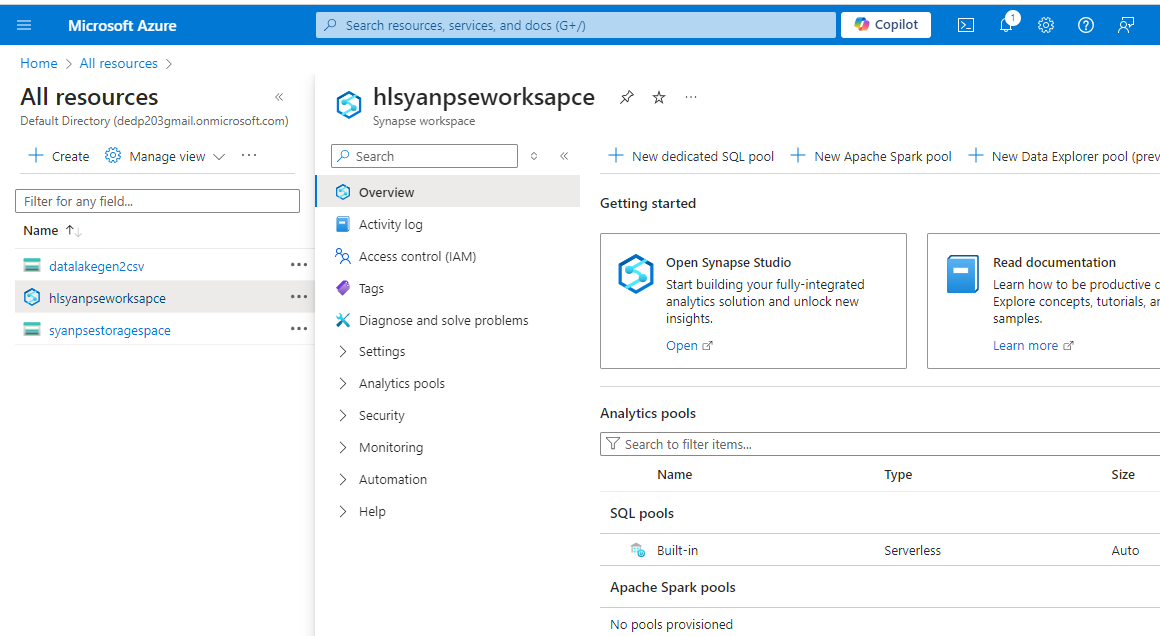

To use the serverless sql we can go to workspace and open azure synapse studio. In the data tab click on + then connect to extenal data and then select azureGen lake2 <br>

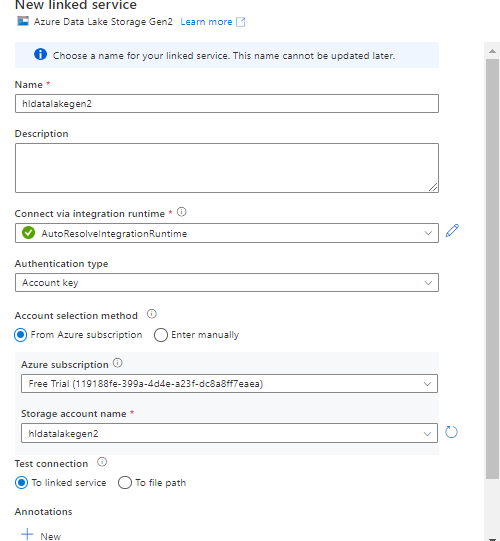

Example of Serverless sql


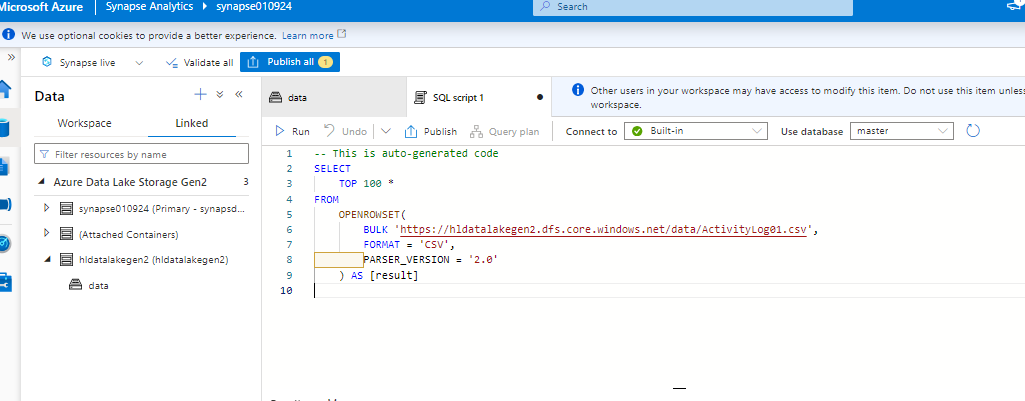

From Azure syanpse we cannot run the sql directly it gives authentication error so for that we need to access to the blob account.
So in storage account go the container IAM (Access Control) and Role to Assignemnt , CLick on + Add and then in role select storage blob reader , then the select the member

Microsoft Entra ID is an identity provider that is used for authentication and authorization purpose.Azure uses RBAC.

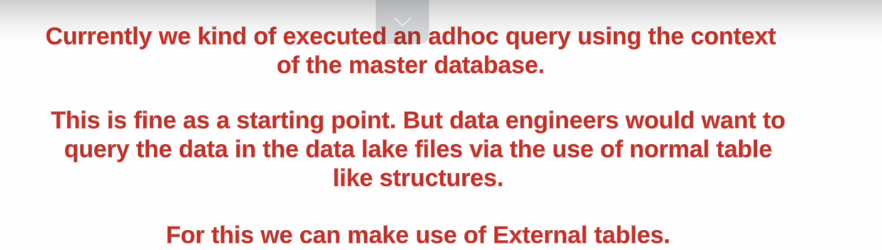

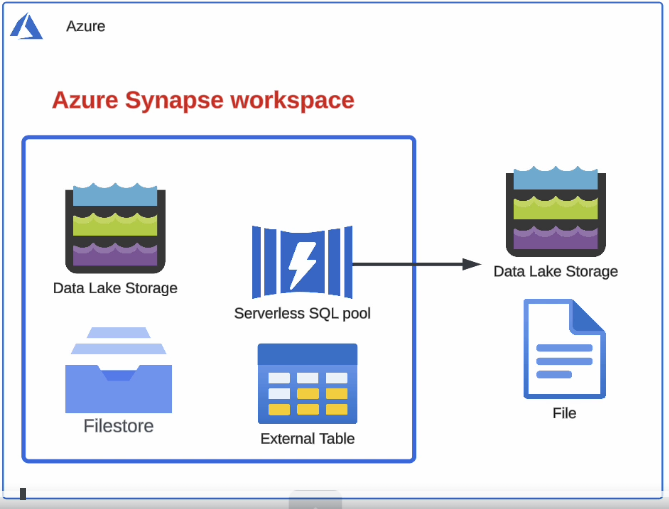

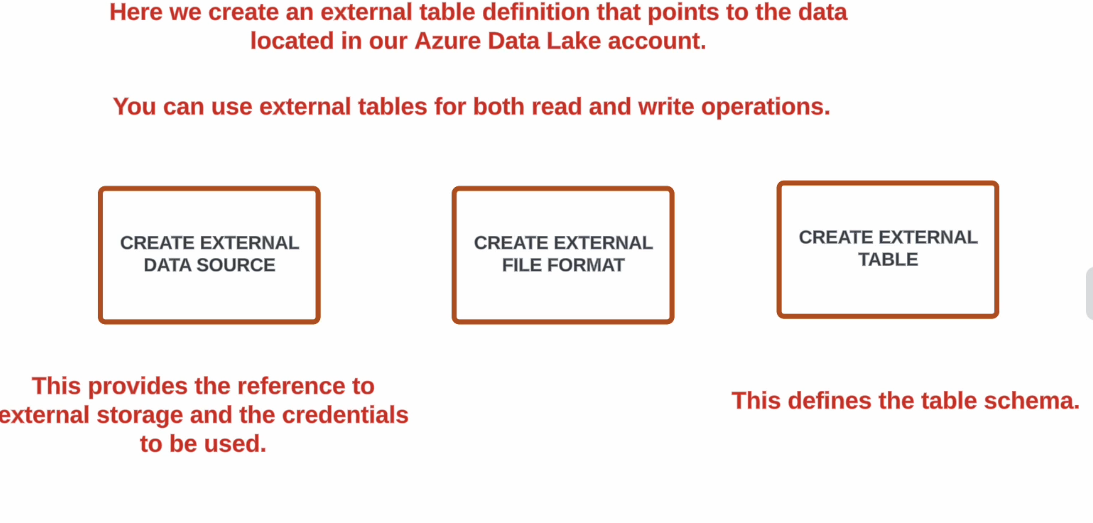

For creating external table inside the Azure Syanpse <br>
1. In develop option create Database<br>
2. SQL :CREATE DATABASE [appdb]; <br>
3. Refrence for create external data source URL : https://learn.microsoft.com/en-us/sql/t-sql/statements/create-external-data-source-transact-sql?view=azure-sqldw-latest&preserve-view=true&tabs=serverless <br>
4. CREATE EXTERNAL DATA SOURCE srcActivityLog <br>
WITH( <br>
    LOCATION='https://datalakegen2csv.blob.core.windows.net/csvcontainer' <br>
); <br>
5. Refrence for create external file format<br>
URL : https://learn.microsoft.com/en-us/sql/t-sql/statements/create-external-file-format-transact-sql?view=azure-sqldw-latest&preserve-view=true&tabs=delimited<br>
6. CREATE EXTERNAL FILE FORMAT delimitedTextFileFormat<br>
WITH(<br>
    FORMAT_TYPE=DELIMITEDTEXT,<br>
    FORMAT_OPTIONS(<br>
        FIELD_TERMINATOR= ',',<br>
        FIRST_ROW=2<br>
    )<br>
);<br>
7. CREATE EXTERNAL TABLE ActivityLog
(
   [Correlationid] varchar(200),
   [Operationname] varchar(300),
   [Status] varchar(100),
   [Eventcategory] varchar(100),
   [Level] varchar(100),
   [Time] varchar(100),
   [Subscription] varchar(200),
   [Eventinitiatedby] varchar(1000),
   [Resourcetype] varchar(300),
   [Resourcegroup] varchar(1000),
   [Resource] varchar(2000))
WITH (
    LOCATION='/ActivityLog01.csv',
    DATA_SOURCE=srcActivityLog,
    FILE_FORMAT=delimitedTextFileFormat
)
<br>
8. SELECT * FROM ActivityLog;<br>
9. to see proper sql PATH : "C:\Users\MSUSERSL123\Documents\Data Engineering\DP-203\temp\Azure_synape_analytics\1. Lab - Using External tables - CSV\01.sql"

Ways of providing access to syanpse 
1. From Azure syanpse we cannot run the sql directly it gives authentication error so for that we need to access to the blob account.So in storage account go the container IAM (Access Control) and Role to Assignemnt , CLick on + Add and then in role select storage blob reader , then the select the member

2. To enable access this is also one of way of doing it not recommended. then change access level of container to the blob anomyous read access
<br>
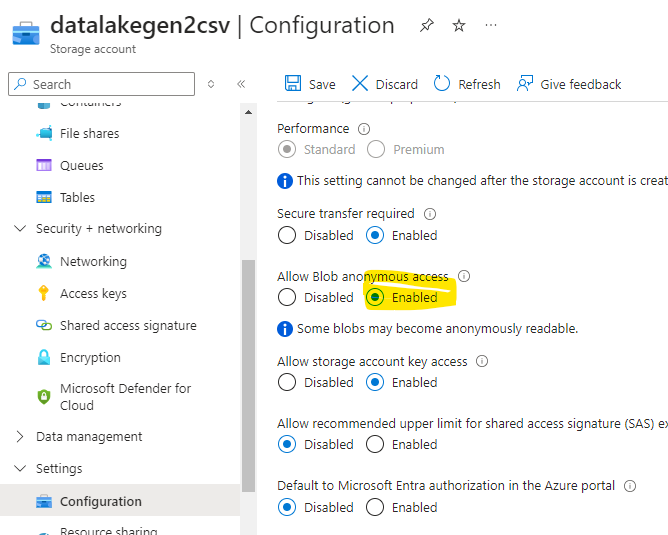

3. Using shared access signature select the options as below
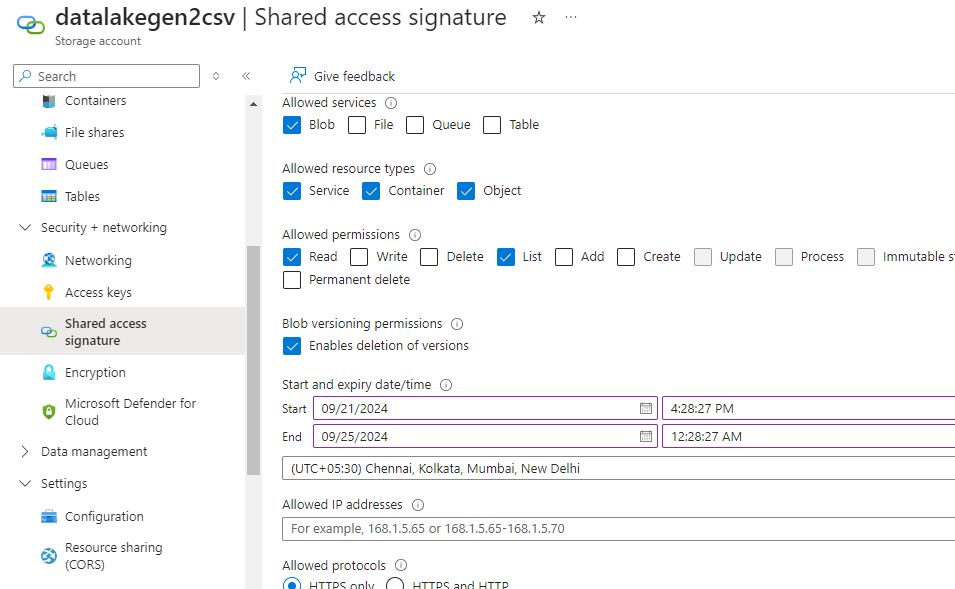
<br> then select generate SAS token in that copy the sas token.


<b>To create table from Parque based file to the ServerlessSql</b>

CREATE MASTER KEY ENCRYPTION BY PASSWORD = 'P@ssword@123'


CREATE DATABASE SCOPED CREDENTIAL sasToken
WITH IDENTITY ='SHARED ACCESS SIGNATURE',
SECRET='sv=2022-11-02&ss=b&srt=sco&sp=rlx&se=2024-09-24T18:58:27Z&st=2024-09-21T10:58:27Z&spr=https&sig=bMApLMLegaCtUltT076N2qLQzVBUmMKsdjiXxB%2Fkdy4%3D'


CREATE EXTERNAL DATA SOURCE srcActivityLog
WITH 
(
    LOCATION='https://datalakegen2csv.blob.core.windows.net/csvcontainer',
    CREDENTIAL=sasToken
)

CREATE EXTERNAL FILE FORMAT parquetFileFormat WITH
(
    FORMAT_TYPE=PARQUET,
    DATA_COMPRESSION='org.apache.hadoop.io.compress.SnappyCodec'
)



CREATE EXTERNAL TABLE ActivityLog
(
   [Correlationid] varchar(200),
   [Operationname] varchar(300),
   [Status] varchar(100),
   [Eventcategory] varchar(100),
   [Level] varchar(100),
   [Time] varchar(100),
   [Subscription] varchar(200),
   [Eventinitiatedby] varchar(1000),
   [Resourcetype] varchar(300),
   [Resourcegroup] varchar(1000),
   [Resource] varchar(2000))
WITH (
    LOCATION='/ActivityLog01.parquet',
    DATA_SOURCE=srcActivityLog,
    FILE_FORMAT=parquetFileFormat
)

SELECT * FROM ActivityLog;

if there are multiple parque file table can be created like this :



CREATE EXTERNAL TABLE ActivityLog
(
   [Correlationid] varchar(200),
   [Operationname] varchar(300),
   [Status] varchar(100),
   [Eventcategory] varchar(100),
   [Level] varchar(100),
   [Time] varchar(100),
   [Subscription] varchar(200),
   [Eventinitiatedby] varchar(1000),
   [Resourcetype] varchar(300),
   [Resourcegroup] varchar(1000),
   [Resource] varchar(2000))
WITH (
    LOCATION='/*.parquet',
    DATA_SOURCE=srcActivityLog,
    FILE_FORMAT=parquetFileFormat
)
